In [55]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# Ruta del archivo
file_path = "/content/drive/My Drive/Tesis/DATASET/data_pro.csv"
# Cargar el archivo CSV en un DataFrame
data_2 = pd.read_csv(file_path)
data_2.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134147 entries, 0 to 134146
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Fecha                                 134147 non-null  object 
 1   Provincia                             134147 non-null  int64  
 2   Canton                                134147 non-null  int64  
 3   Empresa                               134147 non-null  int64  
 4   Grupo Consumo                         134147 non-null  int64  
 5   Numero Clientes                       134147 non-null  float64
 6   Energia Facturada (kWh)               134147 non-null  float64
 7   Facturacion Servicio Electrico (USD)  134147 non-null  float64
 8   Año                                   134147 non-null  int64  
 9   Mes    

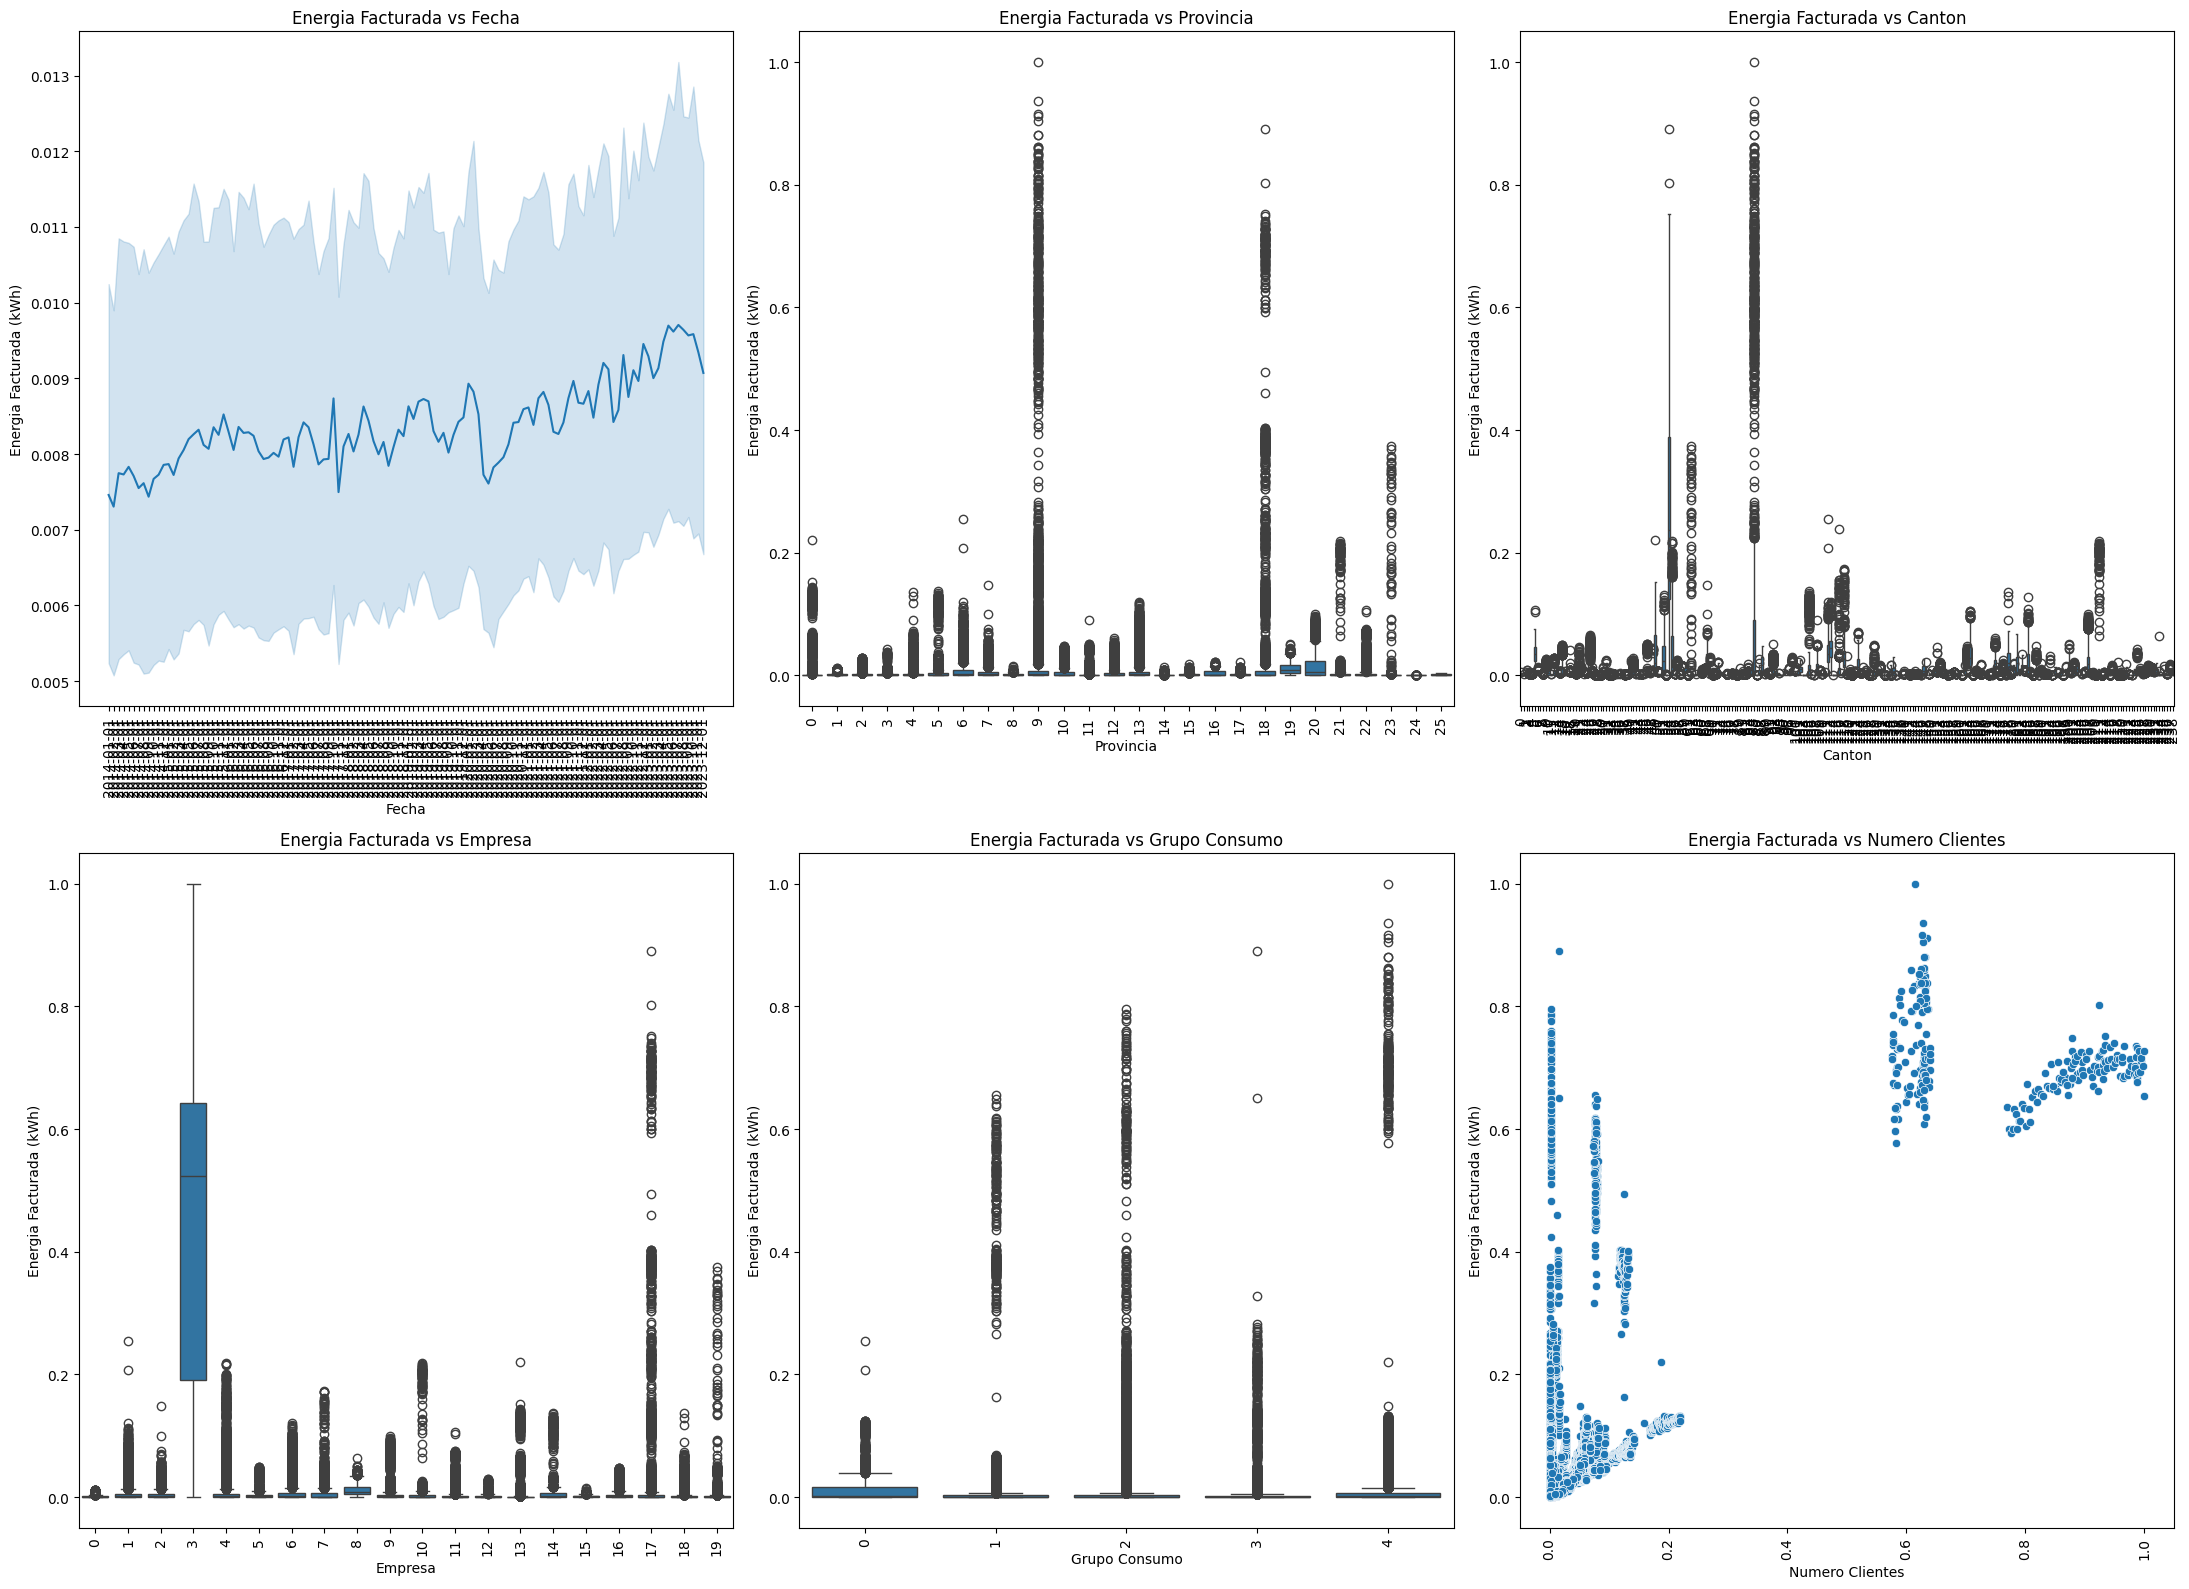

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y la matriz de gráficos
fig, axes = plt.subplots(2, 3, figsize=(22, 16))

# Gráfico: Energia Facturada (kWh) vs Fecha
sns.lineplot(ax=axes[0, 0], x=data_2['Fecha'], y=data_2['Energia Facturada (kWh)'])
axes[0, 0].set_title('Energia Facturada vs Fecha')
axes[0, 0].tick_params(axis='x', rotation=90)  # Rotar etiquetas de X

# Gráfico: Energia Facturada (kWh) vs Provincia
sns.boxplot(ax=axes[0, 1], x=data_2['Provincia'], y=data_2['Energia Facturada (kWh)'])
axes[0, 1].set_title('Energia Facturada vs Provincia')
axes[0, 1].tick_params(axis='x', rotation=90)  # Rotar etiquetas de X

# Gráfico: Energia Facturada (kWh) vs Canton
sns.boxplot(ax=axes[0, 2], x=data_2['Canton'], y=data_2['Energia Facturada (kWh)'])
axes[0, 2].set_title('Energia Facturada vs Canton')
axes[0, 2].tick_params(axis='x', rotation=90)  # Rotar etiquetas de X

# Gráfico: Energia Facturada (kWh) vs Empresa
sns.boxplot(ax=axes[1, 0], x=data_2['Empresa'], y=data_2['Energia Facturada (kWh)'])
axes[1, 0].set_title('Energia Facturada vs Empresa')
axes[1, 0].tick_params(axis='x', rotation=90)  # Rotar etiquetas de X

# Gráfico: Energia Facturada (kWh) vs Grupo Consumo
sns.boxplot(ax=axes[1, 1], x=data_2['Grupo Consumo'], y=data_2['Energia Facturada (kWh)'])
axes[1, 1].set_title('Energia Facturada vs Grupo Consumo')
axes[1, 1].tick_params(axis='x', rotation=90)  # Rotar etiquetas de X

# Gráfico: Energia Facturada (kWh) vs Numero Clientes
sns.scatterplot(ax=axes[1, 2], x=data_2['Numero Clientes'], y=data_2['Energia Facturada (kWh)'])
axes[1, 2].set_title('Energia Facturada vs Numero Clientes')
axes[1, 2].tick_params(axis='x', rotation=90)  # Rotar etiquetas de X

# Ajustar el diseño
plt.tight_layout()
plt.show()


In [57]:
data_3=data_2
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134147 entries, 0 to 134146
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Fecha                                 134147 non-null  object 
 1   Provincia                             134147 non-null  int64  
 2   Canton                                134147 non-null  int64  
 3   Empresa                               134147 non-null  int64  
 4   Grupo Consumo                         134147 non-null  int64  
 5   Numero Clientes                       134147 non-null  float64
 6   Energia Facturada (kWh)               134147 non-null  float64
 7   Facturacion Servicio Electrico (USD)  134147 non-null  float64
 8   Año                                   134147 non-null  int64  
 9   Mes                                   134147 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 10.2+ MB


In [58]:
import pandas as pd

# Lista de variables numéricas a analizar
var_num_1 = ['Energia Facturada (kWh)', 'Numero Clientes']

# Definir función para calcular los límites de IQR
def IQRscore(col):
    # Calcular el primer y tercer cuartil
    Q1 = data_3[col].quantile(0.25)
    Q3 = data_3[col].quantile(0.75)
    IQR = Q3 - Q1
    # Calcular límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

# Definir función para identificar valores atípicos
def outliersIQR(col):
    # Obtener los límites de IQR para la columna
    limite_inferior, limite_superior = IQRscore(col)

    # Identificar valores atípicos
    outliers_inferiores = data_3[data_3[col] < limite_inferior][col]
    outliers_superiores = data_3[data_3[col] > limite_superior][col]

    # Combinar valores atípicos en una serie
    return pd.concat([outliers_inferiores, outliers_superiores], axis=0)

# Iterar sobre cada columna y mostrar valores atípicos
for columna in var_num_1:
    print(f"Valores atípicos en la columna '{columna}':")
    print(outliersIQR(columna))
    print()  # Salto de línea para separar los resultados de cada columna


Valores atípicos en la columna 'Energia Facturada (kWh)':
1         0.023265
17        0.038257
18        0.052090
19        0.124444
20        0.015967
            ...   
134075    0.070993
134099    0.010601
134101    0.009699
134120    0.206375
134140    0.063406
Name: Energia Facturada (kWh), Length: 18838, dtype: float64

Valores atípicos en la columna 'Numero Clientes':
3         0.004853
11        0.004239
18        0.020132
19        0.004776
21        0.168528
            ...   
134110    0.005713
134118    0.003600
134122    0.003675
134142    0.007307
134146    0.009160
Name: Numero Clientes, Length: 23376, dtype: float64



In [59]:
# Definir las variables de interés para buscar valores atípicos
var_num_1 = ['Energia Facturada (kWh)', 'Numero Clientes']
varnum1 = {}

# Función para calcular los valores atípicos en cada columna y almacenarlos en un diccionario
for var1 in var_num_1:  # varnum1 contendrá los nombres de variables donde se encontraron valores atípicos
    varnum1[var1] = outliersIQR(var1).index.to_list()

# Mostrar el diccionario con los índices de los valores atípicos para cada variable
varnum1


{'Energia Facturada (kWh)': [1,
  17,
  18,
  19,
  20,
  21,
  98,
  109,
  111,
  146,
  174,
  215,
  216,
  217,
  219,
  224,
  229,
  230,
  231,
  232,
  233,
  280,
  284,
  289,
  290,
  291,
  292,
  293,
  299,
  301,
  307,
  313,
  321,
  326,
  327,
  328,
  329,
  330,
  342,
  400,
  404,
  407,
  409,
  410,
  412,
  421,
  430,
  431,
  432,
  433,
  434,
  438,
  442,
  443,
  455,
  456,
  457,
  458,
  465,
  496,
  498,
  499,
  502,
  526,
  527,
  530,
  532,
  534,
  567,
  568,
  571,
  622,
  624,
  625,
  626,
  668,
  669,
  671,
  697,
  715,
  724,
  740,
  745,
  746,
  747,
  748,
  749,
  751,
  752,
  753,
  773,
  775,
  776,
  783,
  796,
  874,
  879,
  882,
  900,
  902,
  912,
  914,
  916,
  938,
  939,
  940,
  941,
  942,
  944,
  945,
  947,
  956,
  959,
  961,
  964,
  966,
  967,
  968,
  969,
  972,
  973,
  974,
  975,
  976,
  993,
  996,
  1011,
  1012,
  1013,
  1014,
  1015,
  1089,
  1105,
  1106,
  1107,
  1108,
  1109,
  1197,
  1

Estadísticas descriptivas de las variables escaladas:
       Numero Clientes  Energia Facturada (kWh)  \
count    134147.000000            134147.000000   
mean          0.004630                 0.008394   
std           0.034661                 0.044538   
min           0.000000                 0.000000   
25%           0.000034                 0.000132   
50%           0.000188                 0.000758   
75%           0.001364                 0.003470   
max           1.000000                 1.000000   

       Facturacion Servicio Electrico (USD)  
count                         134147.000000  
mean                               0.238830  
std                                0.033031  
min                                0.000000  
25%                                0.232678  
50%                                0.233160  
75%                                0.235300  
max                                1.000000  


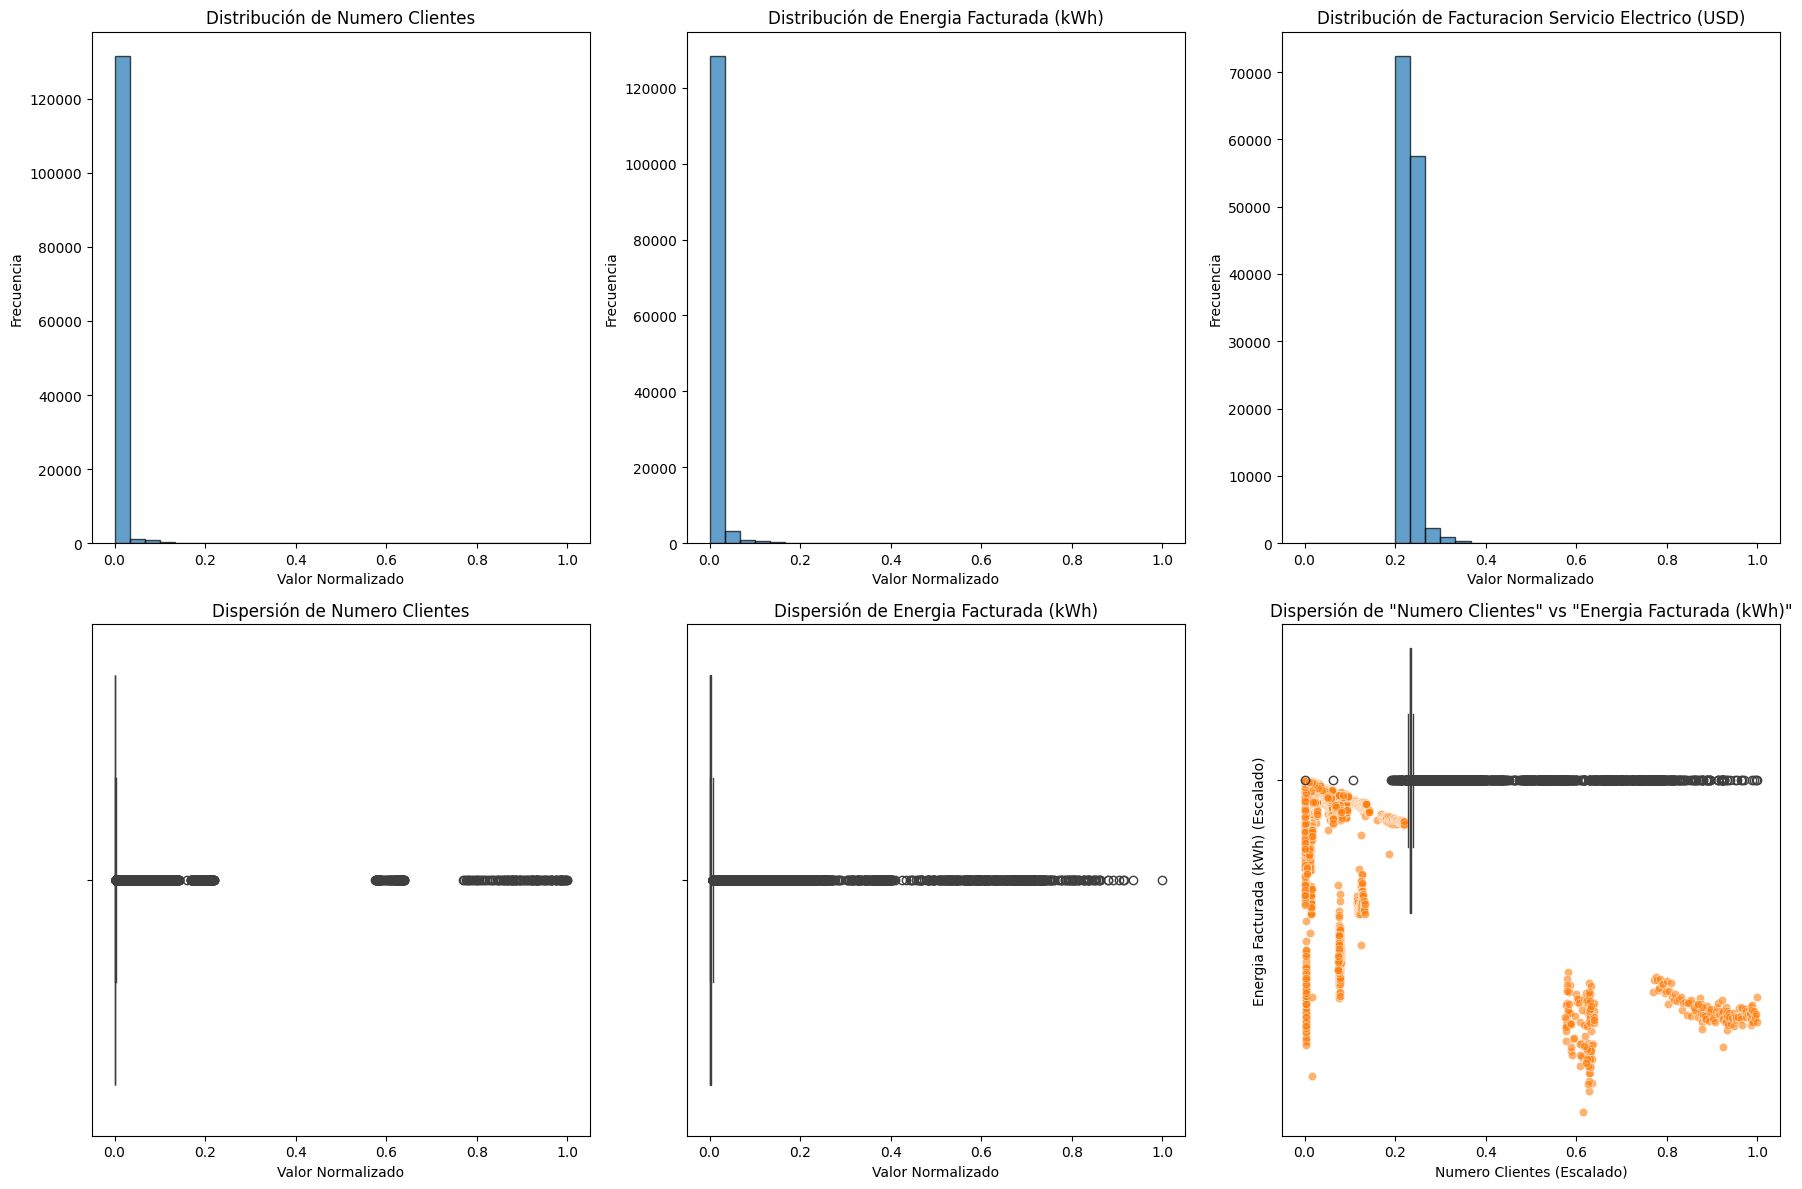

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
# Estadísticas descriptivas de las columnas escaladas
print("Estadísticas descriptivas de las variables escaladas:")
print(data_3[['Numero Clientes', 'Energia Facturada (kWh)', 'Facturacion Servicio Electrico (USD)']].describe())
plt.figure(figsize=(18, 12))

# 1. Histogramas para cada columna numérica escalada
for i, column in enumerate(['Numero Clientes', 'Energia Facturada (kWh)', 'Facturacion Servicio Electrico (USD)']):
    plt.subplot(2, 3, i+1)
    plt.hist(data_3[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribución de {column}')
    plt.xlabel('Valor Normalizado')
    plt.ylabel('Frecuencia')

# 2. Boxplots para visualizar la dispersión y posibles outliers
for i, column in enumerate(['Numero Clientes', 'Energia Facturada (kWh)', 'Facturacion Servicio Electrico (USD)']):
    plt.subplot(2, 3, i+4)
    sns.boxplot(x=data_3[column])
    plt.title(f'Dispersión de {column}')
    plt.xlabel('Valor Normalizado')

# 3. Gráfico de dispersión entre "Numero Clientes" y "Energia Facturada (kWh)"
plt.subplot(2, 3, 6)
sns.scatterplot(x=data_3['Numero Clientes'], y=data_3['Energia Facturada (kWh)'], alpha=0.6)
plt.title('Dispersión de "Numero Clientes" vs "Energia Facturada (kWh)"')
plt.xlabel('Numero Clientes (Escalado)')
plt.ylabel('Energia Facturada (kWh) (Escalado)')

# Ajuste para evitar solapamiento de subgráficas
plt.tight_layout()
plt.show()


**CORRELACION**


In [61]:
# Variable objetivo (a predecir)
variable_objetivo = 'Energia Facturada (kWh)'

# Variables predictoras (todas las demás columnas)
variables_predictoras = [col for col in data_3.columns if col != variable_objetivo]

# Mostrar las variables
print("Variable a predecir:", variable_objetivo)
print("Variables predictoras:", variables_predictoras)


Variable a predecir: Energia Facturada (kWh)
Variables predictoras: ['Fecha', 'Provincia', 'Canton', 'Empresa', 'Grupo Consumo', 'Numero Clientes', 'Facturacion Servicio Electrico (USD)', 'Año', 'Mes']


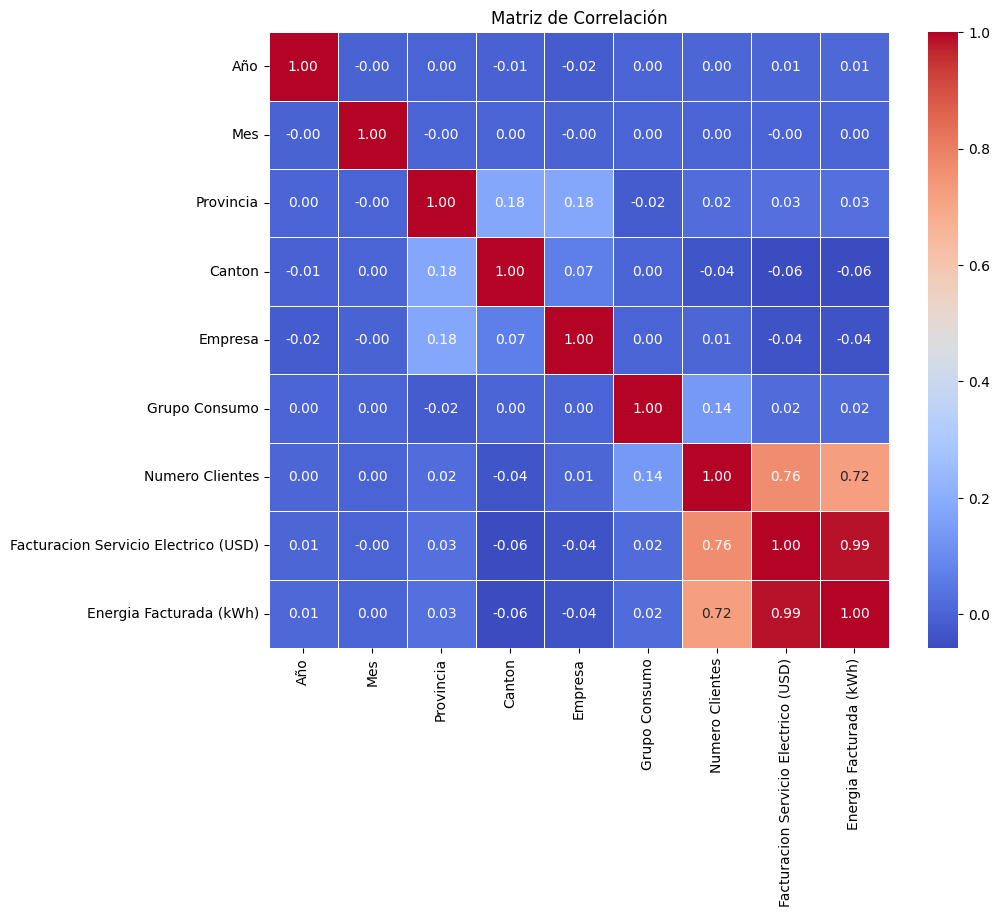

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Variables predictoras y objetivo
predictors = ['Año', 'Mes', 'Provincia', 'Canton', 'Empresa', 'Grupo Consumo', 'Numero Clientes', 'Facturacion Servicio Electrico (USD)']
target = 'Energia Facturada (kWh)'

# Calcular la correlación entre las variables incluyendo la variable objetivo
correlation_matrix = data_3[predictors + [target]].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [63]:
# Calcular la correlación entre las variables numéricas
correlation = data_3.corr(numeric_only=True)

# Mostrar la correlación con la variable objetivo 'Energia Facturada (kWh)'
print(correlation['Energia Facturada (kWh)'])

Provincia                               0.030557
Canton                                 -0.058119
Empresa                                -0.040718
Grupo Consumo                           0.016516
Numero Clientes                         0.721281
Energia Facturada (kWh)                 1.000000
Facturacion Servicio Electrico (USD)    0.986345
Año                                     0.009689
Mes                                     0.000203
Name: Energia Facturada (kWh), dtype: float64


**REGRESION LINEAL SIMPLE**

x_train.shape: (107317, 1)
x_test.shape: (26830, 1)
a = 0.004061227294200969 y b = [0.92146013]
              Actual  Predicted
90839   2.134356e-03   0.004687
87950   3.942393e-03   0.004087
25093   1.428217e-02   0.004062
13087   4.311467e-04   0.005106
11445   1.892485e-05   0.004076
84521   1.353769e-03   0.004111
90599   6.892627e-03   0.023178
84770   4.737148e-03   0.012942
121398  1.109915e-01   0.007316
31358   7.419339e-07   0.004063


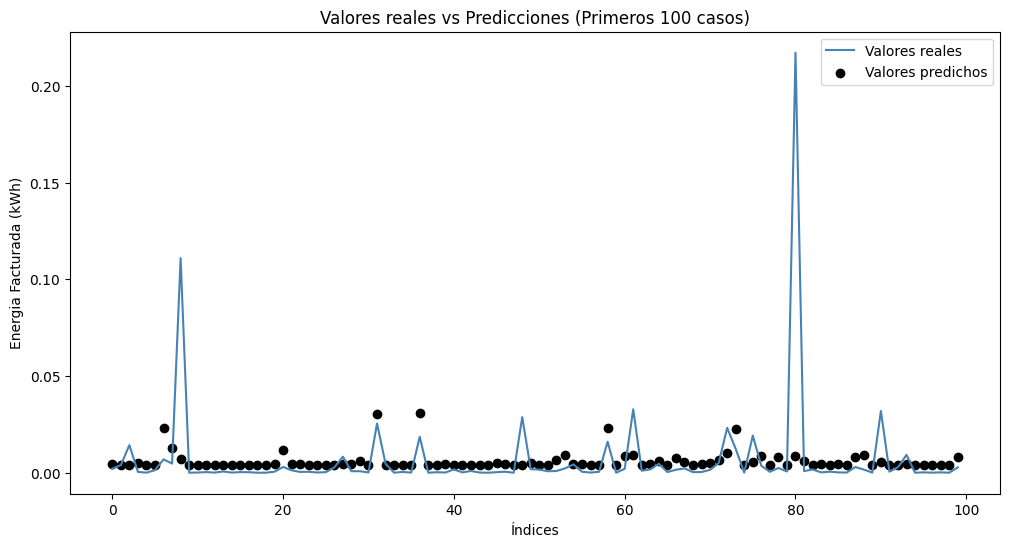

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar las variables predictoras (x) y la variable objetivo (y)
x = data_3[['Numero Clientes']]  # Variables predictoras
y = data_3['Energia Facturada (kWh)']  # Variable objetivo

# Dividir los datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=10)
print(f"x_train.shape: {x_train.shape}")
print(f"x_test.shape: {x_test.shape}")


rl1 = LinearRegression()  # Instancia de LinearRegression

# Instruir al modelo que aprenda (fit) de los datos (x_train, y_train)
rl1.fit(x_train, y_train)

# Parámetros que ha estimado la regresión lineal
print('a = ' + str(rl1.intercept_), 'y b = ' + str(rl1.coef_))

# Utilizar el modelo para predecir con el conjunto de entrenamiento
y_train_predicted = rl1.predict(x_train)

# Utilizar el modelo para predecir con el conjunto de test
y_test_predicted = rl1.predict(x_test)

# Ver valores reales vs predichos para el conjunto de test
lr_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})
print(lr_predictions.head(10))  # Mostrar las primeras 10 filas

# Visualización de los resultados
# Visualizar los valores reales de y (líneas azules) vs. los valores predichos (puntos negros).
plt.figure(figsize=(12, 6))

# Graficar valores reales
plt.plot(y_test.values[:100], color='steelblue', label='Valores reales')

# Graficar valores predichos
plt.scatter(range(100), y_test_predicted[:100], color='black', label='Valores predichos')

plt.xlabel('Índices')
plt.ylabel('Energia Facturada (kWh)')
plt.title('Valores reales vs Predicciones (Primeros 100 casos)')
plt.legend()
plt.show()


In [65]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true=y_test, y_pred=y_test_predicted)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)

# Mostrar MSE y RMSE
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

# Coeficiente de determinación R^2
r2_train = r2_score(y_train, y_train_predicted)
print('Coeficiente de Determinación R2 (train) = ' + str(r2_train))

# R² sobre el dataset de test
r2_test = r2_score(y_test, y_test_predicted)
print('Coeficiente de Determinación R2 (test) = ' + str(r2_test))


Error Cuadrático Medio (MSE) = 0.001099874842845898
Raíz del Error Cuadrático Medio (RMSE) = 0.03316436103479001
Coeficiente de Determinación R2 (train) = 0.5311644276669436
Coeficiente de Determinación R2 (test) = 0.47985384893368765


**REGRESION LINEAL MULTIPLE**


In [66]:
data_3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134147 entries, 0 to 134146
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Fecha                                 134147 non-null  object 
 1   Provincia                             134147 non-null  int64  
 2   Canton                                134147 non-null  int64  
 3   Empresa                               134147 non-null  int64  
 4   Grupo Consumo                         134147 non-null  int64  
 5   Numero Clientes                       134147 non-null  float64
 6   Energia Facturada (kWh)               134147 non-null  float64
 7   Facturacion Servicio Electrico (USD)  134147 non-null  float64
 8   Año                                   134147 non-null  int64  
 9   Mes                                   134147 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 10.2+ MB


X_train.shape: (107317, 7)
X_test.shape: (26830, 7)

Parámetros del modelo:
Constante: -0.17947906917567263
Coeficientes:
Provincia: 0.00017831666964246277
Canton: -2.0850974934094344e-05
Empresa: -0.00036161511305204215
Grupo Consumo: -0.0030112088740171915
Numero Clientes: 0.9272602887249364
Año: 9.666810453645167e-05
Mes: -1.6028709677866796e-05

Métricas de evaluación en el conjunto de prueba:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.01
R² Score: 0.46


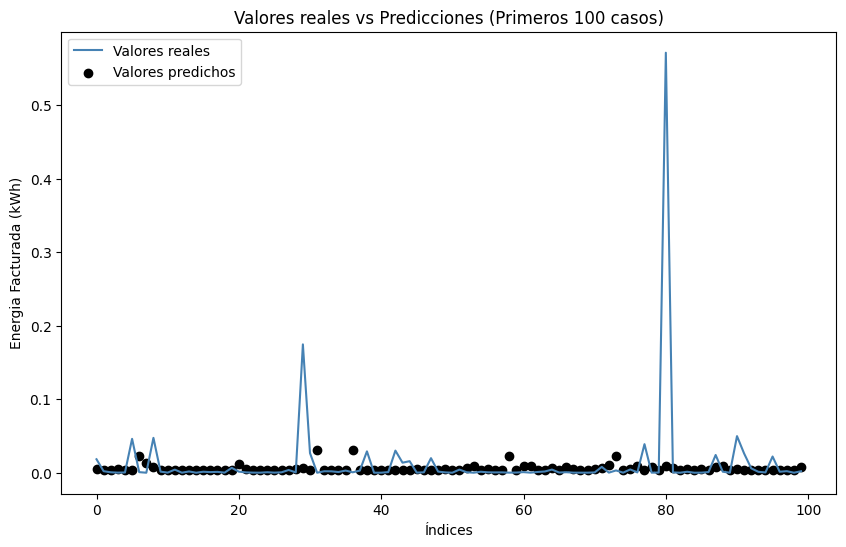


Primeras 10 filas de comparación entre valores reales y predichos:
          Actual  Predicted
14146   0.018322   0.002693
75004   0.002077   0.006044
107558  0.000590   0.012235
33297   0.000133   0.013836
106893  0.000333   0.006619
40119   0.046089   0.073430
127346  0.000791   0.012267
52070   0.000007   0.001578
119262  0.047435   0.082281
48148   0.001451   0.004478


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Selección de variables predictoras (X) y variable objetivo (y)

X = data_3[['Provincia', 'Canton', 'Empresa', 'Grupo Consumo', 'Numero Clientes', 'Año', 'Mes']]  # Variables predictoras

y = data_3['Energia Facturada (kWh)']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener los parámetros del modelo
print("\nParámetros del modelo:")
print(f"Constante: {model.intercept_}")
print("Coeficientes:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluar el modelo con métricas en el conjunto de prueba
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("\nMétricas de evaluación en el conjunto de prueba:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualización de los resultados
# Visualizar los valores reales de y (líneas azules) vs. los valores predichos (puntos negros).
plt.figure(figsize=(10, 6))

# Graficar valores reales
plt.plot(y_test.values[:100], color='steelblue', label='Valores reales')

# Graficar valores predichos
plt.scatter(range(100), y_test_predicted[:100], color='black', label='Valores predichos')

plt.xlabel('Índices')
plt.ylabel('Energia Facturada (kWh)')
plt.title('Valores reales vs Predicciones (Primeros 100 casos)')
plt.legend()
plt.show()

# Resultados comparativos: valores reales vs predichos
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nPrimeras 10 filas de comparación entre valores reales y predichos:")
print(comparison_df.head(10))


In [68]:
import pandas as pd

# Crear DataFrame con los datos reales, predichos rls y predichos rlm
df_resultados = pd.DataFrame({
    'Número de Ítem': range(1, len(y_test) + 1),
    'Número de Fila': y_test.index,
    'Valor Real': y_test.values,
    'Valor Predicho RLS': y_test_predicted,  # Resultados de Regresión Lineal Simple
    'Valor Predicho RLM': y_test_pred        # Resultados de Regresión Lineal Múltiple
})

# Guardar en un archivo Excel
file_name = "resultados_regresion.xlsx"
df_resultados.to_excel(file_name, index=False)

# Descargar el archivo (para Google Colab)
from google.colab import files
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>